Analysis:
- draw graph of MRR vs num of training triples per relationship
- divide relationships up between the different types of relationships that they are and see the results then 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1 vs All comparison, BCE and CE

In [2]:
ce_tuck = pd.read_csv('best_tucker_ce_covid_rel_NEWMRR.csv')
bce_tuck = pd.read_csv('tucker_bce_relation_covid.csv')
bce_cp = pd.read_csv('best_cplex_covid_rel_BCE.csv')
ce_cp = pd.read_csv('cplex_ce_relation_covid.csv')

In [3]:
bce_cp.head()

,Relation,MRR,h@1,h@3,h@10
0,8,0.035863,0.015349,0.028364,0.065693
1,1,0.044858,0.022272,0.042931,0.080052
2,7,0.172514,0.101493,0.178253,0.278743
3,3,0.021108,0.005821,0.014877,0.038163
4,9,0.507146,0.327973,0.485258,0.623538


In [78]:
ce_cp[ce_cp['Relation'] == 26]

,Relation,MRR,h@1,h@3,h@10
24,26,0.513247,0.5,0.5,0.5


In [79]:
ce_cp.head(20)

,Relation,MRR,h@1,h@3,h@10
0,8,0.098049,0.047397,0.098477,0.192043
1,1,0.084085,0.047127,0.080374,0.151388
2,7,0.222811,0.148619,0.246435,0.371435
3,3,0.047284,0.016171,0.038810,0.098965
4,9,0.421307,0.311160,0.477217,0.632919
5,10,0.418452,0.308267,0.475005,0.629887
6,14,0.417986,0.288126,0.477791,0.672046
7,0,0.162621,0.088454,0.177686,0.315487
8,5,0.083225,0.033685,0.079858,0.174267
9,19,0.048375,0.014851,0.044554,0.106931


In [4]:
from matplotlib import pyplot as plt

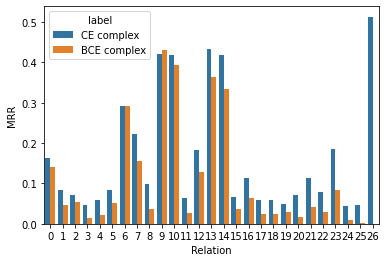

In [219]:
plt.figure()
sns.barplot(x='Relation', y='MRR', hue='label', data=concatenated)
plt.show()

In [223]:
bce_tuck['label'] = 'BCE tucker'
ce_tuck['label'] = 'CE tucker'
concatenated_t = pd.concat([ce_tuck, bce_tuck])

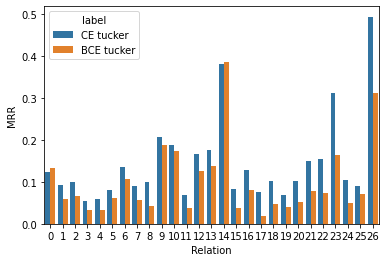

In [224]:
plt.figure()
sns.barplot(x='Relation', y='MRR', hue='label', data=concatenated_t)
plt.show()

In [225]:
def plot_group(df1, df2, label1=None, label2=None):
    if label1 is not None:
        df1['label'] = label1
    if label2 is not None:
        df2['label'] = label2
    conc = pd.concat([df1, df2])
    plt.figure()
    sns.barplot(x='Relation', y='h@10', hue='label', data=conc)
    plt.show()
    return

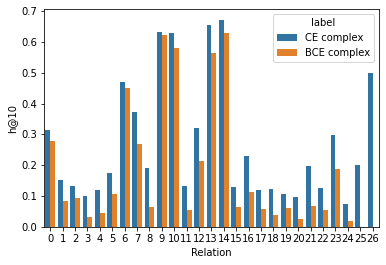

In [228]:
plot_group(ce_cp, bce_cp, label1='CE complex', label2='BCE complex')

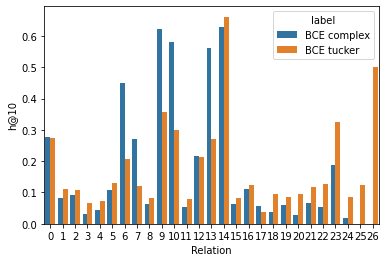

In [229]:
plot_group(bce_cp, bce_tuck)

In [4]:
from libkge import datasets
d = datasets.load_dataset_from_dir('/app/Antonia/Aladdin/biolink/testing/data/covid')

/opt/miniconda/envs/nina/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda/envs/nina/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda/envs/nina/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda/envs/nina/lib/python3.7/site-packages/tensorflow/python/frame

In [5]:
train_data = pd.DataFrame(d.data['train'])
relation_count = train_data[1].value_counts()

In [136]:
!pwd

/app/Antonia/Aladdin/biolink/COVID results analysis


In [3]:
very_very_common = [] # 6000
very_common = [] # 10 000 - 40 000
common = [] # 1000 - 6000
rare = [] # 400 - 700
very_rare = [] # 24

In [6]:
relation_count

0     66656
10    37359
7     35722
5     35445
9     33548
8     33415
12    29809
13    28876
14    26917
11    26698
6     17892
1     13007
4     12114
3      5856
16     5453
2      5265
19     4192
18     3049
17     2582
21     2387
15     1966
20     1087
23      611
22      588
24      428
25      411
26       24
Name: 1, dtype: int64

In [7]:
for rel, count in dict(relation_count).items():
    if count > 60000:
        very_very_common.append(rel)
    elif count >= 10000 and count <=40000:
        very_common.append(rel)
    elif count >= 1000 and count <=6000:
        common.append(rel)
    elif count >= 400 and count <=700:
        rare.append(rel)
    else:
        very_rare.append(rel)

In [8]:
len(very_very_common), len(very_common), len(common), len(rare), len(very_rare)

(1, 12, 9, 4, 1)

In [9]:
def how_common(x):
    if x in very_very_common:
        return 'very very common'
    elif x in very_common:
        return 'very common'
    elif x in common:
        return 'common'
    elif x in very_rare:
        return 'very rare'
    else:
        return 'rare'

In [10]:
amie_res_rel = pd.read_csv('../testing/data/covid/res_by_rel_covid.txt', sep='\t', header=None)
amie_res_rel.head()

,0,1,2,3,4,5,6,7,8,9
0,GG,8349,0.00,0.00,0.00,inf,0.00,0.00,0.00,inf
1,U,1549,0.33,7.71,2.16,inf,0.30,7.84,2.74,inf
2,Te,656,0.40,9.22,2.59,inf,0.38,9.45,2.97,inf
3,Pr,773,0.00,0.00,0.00,inf,0.00,0.00,0.00,inf
4,Sa,1474,0.01,1.15,1.15,inf,0.01,1.15,1.15,inf


In [11]:
amie_res_rel[0] = amie_res_rel[0].apply(lambda x: d.rel_mappings[x])
amie_res_rel.drop(columns=[1,2,3,4,5,6], inplace=True)

In [12]:
amie_res_rel.head()

,0,7,8,9
0,0,0.00,0.00,inf
1,1,7.84,2.74,inf
2,2,9.45,2.97,inf
3,3,0.00,0.00,inf
4,4,1.15,1.15,inf


In [13]:
amie_res_rel.columns = ['Relation', 'h@10', 'h@1', 'MRR']
amie_res_rel.head()

,Relation,h@10,h@1,MRR
0,0,0.00,0.00,inf
1,1,7.84,2.74,inf
2,2,9.45,2.97,inf
3,3,0.00,0.00,inf
4,4,1.15,1.15,inf


In [14]:
amie_res_rel['h@10'] = amie_res_rel['h@10'].apply(lambda x: x/100)

In [15]:
amie_res_rel.head()

,Relation,h@10,h@1,MRR
0,0,0.0000,0.00,inf
1,1,0.0784,2.74,inf
2,2,0.0945,2.97,inf
3,3,0.0000,0.00,inf
4,4,0.0115,1.15,inf


In [16]:
amie_res_rel['rel_occurrence'] =  amie_res_rel['Relation'].apply(lambda x: relation_count[x])

In [17]:
ce_cp['relation label'] = ce_cp['Relation'].apply(lambda x: how_common(x))
ce_tuck['relation label'] = ce_tuck['Relation'].apply(lambda x: how_common(x))
bce_tuck['relation label'] = bce_tuck['Relation'].apply(lambda x: how_common(x))
bce_cp['relation label'] = bce_cp['Relation'].apply(lambda x: how_common(x))


amie_res_rel['relation label'] = amie_res_rel['Relation'].apply(lambda x: how_common(x))

In [ ]:
def plot_relation_common(dfs, labels, groupby_l = 'relation label', save=None, mean=False):
    
    palette = {'CE Complex': 'blue',
              'BCE Complex': 'royalblue',
              'CE Tucker': 'indianred',
              'BCE Tucker': 'salmon', 
              'AMIE': 'mediumpurple'}
    concat = []
    for i,df in enumerate(dfs):
        if mean:
            d = df.groupby(groupby_l)['h@10'].mean().reset_index()
        else:
            d = df.groupby(groupby_l)['h@10'].sum().reset_index()
        if len(labels) > 0:
            d['label'] = labels[i]
        concat.append(d)
    
    conc = pd.concat(concat)
    f = plt.figure()
    sns.barplot(x='relation label', y='h@10', hue = 'label', data=conc, order=['very rare', 'rare', 'common', 'very common', 'very very common'],\
                palette= palette)
    plt.xticks(rotation=15)
    if mean:
        what = 'Mean'
    else:
        what = 'Sum'
    plt.ylabel(what + ' hits@10 per relation')
    plt.xlabel('Frequency of relaiton')
    plt.title('H@10 model comparison performance per relation')
    plt.tight_layout()
    plt.show()
    if save is not None:
        plt.tight_layout()
        f.savefig(save + '_mean_' + str(mean) + '.jpg')

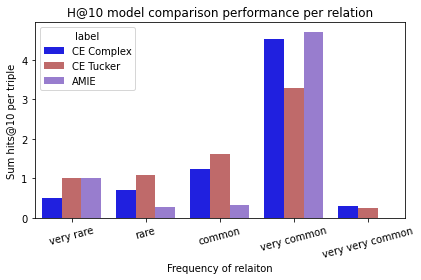

In [52]:
plot_relation_common([ce_cp, ce_tuck, amie_res_rel], ['CE Complex', 'CE Tucker', 'AMIE'])

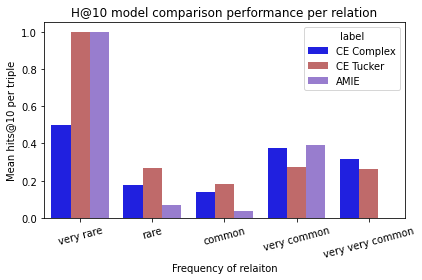

In [54]:
plot_relation_common([ce_cp, ce_tuck, amie_res_rel], ['CE Complex', 'CE Tucker', 'AMIE'], mean=True)

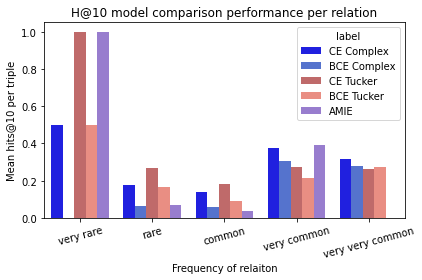

<Figure size 432x288 with 0 Axes>

In [55]:
plot_relation_common([ce_cp, bce_cp, ce_tuck, bce_tuck, amie_res_rel], ['CE Complex', 'BCE Complex', 'CE Tucker', 'BCE Tucker', 'AMIE'], mean=True, save='covid_rel_comparisons')

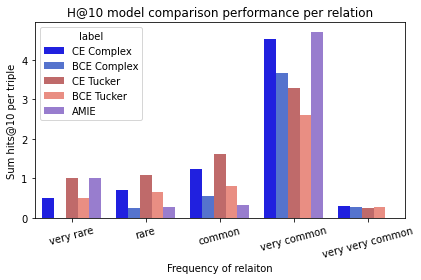

<Figure size 432x288 with 0 Axes>

In [56]:
plot_relation_common([ce_cp, bce_cp, ce_tuck, bce_tuck, amie_res_rel], ['CE Complex', 'BCE Complex', 'CE Tucker', 'BCE Tucker', 'AMIE'], save='covid_relation_comparisions')

# Entities v rare etc

In [83]:
def get_entities_info(path):
    with open(path, 'r') as f:
        cplex_cp_ents = []
        for l in f.readlines():
            res = []

            if 'VERYRARE HEAD' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('very rare head')
            elif 'VERYRARE TAIL' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('very rare tail')
            elif 'VERYVERY-COMMON HEAD' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('very very common head')
            elif 'VERYVERY-COMMON TAIL' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('very very common tail')
            elif 'VERY-COMMON HEAD' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('very common head')
            elif 'VERY-COMMON TAIL' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('very common tail')
            elif 'COMMON- HEAD' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('common head')
            elif 'COMMON- TAIL' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('common tail')
            elif 'RARE HEAD' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('rare head')
            elif 'RARE TAIL' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('rare tail')
            else:
                continue
            res += [float(mrr), float(h1), float(h3), float(h10)]
            cplex_cp_ents.append(res)
        return cplex_cp_ents

In [84]:
cplex_ents = get_entities_info('CE_CP_NEWENTS.log')
bce_cplex_ents = get_entities_info('BCE_CP_NEWENTS.log')
tuck_ents = get_entities_info('CE_T_NEWENTS.log')
bce_tuck_ents = get_entities_info('NEW_ENTS_ANAL.log')

In [86]:
len(bce_tuck_ents)

10

In [87]:
all_ents = cplex_ents + bce_cplex_ents + tuck_ents + bce_tuck_ents
df = pd.DataFrame(all_ents)
df['label'] = (['CE Complex'] * 10)+ (['BCE Complex'] * 10) + \
                (['CE Tucker'] * 10) + (['BCE Tucker'] * 10)

In [111]:
order = ['CE Complex', 'BCE Complex', 'CE Tucker', 'BCE Tucker']
def plot_entity_common(dfs, labels, what='head', mrr=False, save=None):
    
    
    df = dfs[dfs[0].str.contains(what)]
    
    palette = {'CE Complex': 'blue',
              'BCE Complex': 'royalblue',
              'CE Tucker': 'indianred',
              'BCE Tucker': 'salmon', 
              'AMIE': 'mediumpurple'}
#     concat = []
#     for i,df in enumerate(dfs):
    if mrr:
        d = df.groupby([0, 'label'])[1].mean().reset_index()
    else:
        d = df.groupby([0, 'label'])[4].mean().reset_index()
    d = d.sort_values(by='label', key=lambda col: col.apply(lambda x: np.where(np.array(order) == x)))
    if len(labels) > 0:
        d['label'] = labels[i]
#     concat.append(d)
    
#     conc = pd.concat(concat)
    f = plt.figure()
    if mrr:
        g = sns.barplot(x=0, y=1, hue = 'label', data=d, order=['very rare ' + what, 'rare ' + what, 'common ' + what, 'very common ' + what, 'very very common ' + what],\
                    palette= palette)
    else:
        g = sns.barplot(x=0, y=4, hue = 'label', data=d, order=['very rare ' + what, 'rare ' + what, 'common ' + what, 'very common ' + what, 'very very common ' + what],\
                    palette= palette)
    
    plt.xticks(rotation=15)
    plt.xlabel('Rarity of entity predicted')
    if mrr:
        plt.ylabel('MRR')
        plt.title('MRR model comparison for ' + what + ' prediction')
    else:
        plt.ylabel('Hits@10')
        plt.title('Hits@10 model comparison for ' + what + ' prediction')
    if save is not None:
        plt.tight_layout()
        f.savefig(save + '_mrr_' + str(mrr) + '.jpg')
    plt.show()

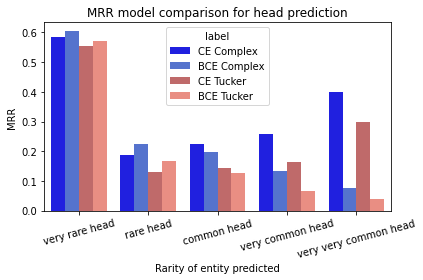

In [113]:
plot_entity_common(df, [], mrr=True, save='heade_deep_comparison_covid')

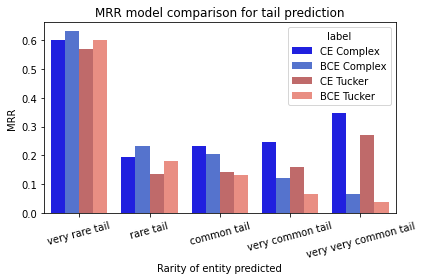

In [114]:
plot_entity_common(df, [], what='tail', mrr=True, save='tail_deep_comparison_covid')

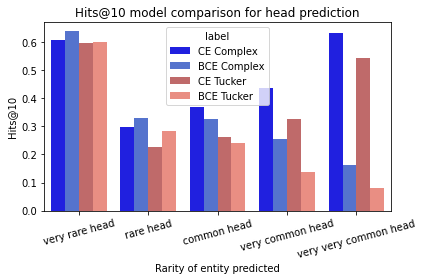

In [115]:
plot_entity_common(df, [], mrr=False, save='head_deep_comparison_covid')

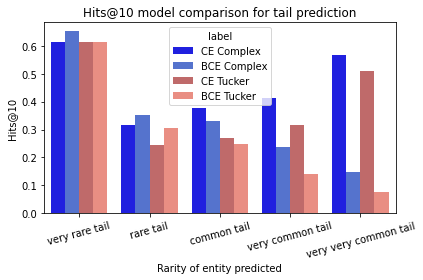

In [117]:
plot_entity_common(df, [], what='tail', mrr=False, save='tail_deep_comparison_covid')

## Entities

In [263]:
!pwd

/app/Antonia/Aladdin/biolink/COVID results analysis


In [48]:
def get_entities_info(path):
    with open(path, 'r') as f:
        cplex_cp_ents = []
        for l in f.readlines():
            res = []

            if 'MID-RARE HEAD' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('midrare head')
            elif 'MID-RARE TAIL' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('midrare tail')
            elif 'NOT-RARE HEAD' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('notrare head')
            elif 'NOT-RARE TAIL' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('notrare tail')
            elif 'RARE HEAD' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('rare head')
            elif 'RARE TAIL' in l:
                l = l.split()
                mrr = l[5]
                h1 = l[7]
                h3 = l[9]
                h10 = l[11]
                res.append('rare tail')
            else:
                continue
            res += [float(mrr), float(h1), float(h3), float(h10)]
            cplex_cp_ents.append(res)
        return cplex_cp_ents

In [49]:
cplex_ents = get_entities_info('../CORRECT_MRR_CPLEX.log')
bce_cplex_ents = get_entities_info('../CORRECT_MRR_BCE_COVID_COMPLEX.log')
tuck_ents = get_entities_info('../CORRECT_MRR_COVID_CE_TUCKER.log')
bce_tuck_ents = get_entities_info('../rare_ents_bce_tuck.log')

In [34]:
bce_tuck_ents

[['rare head', 0.027804, 0.020134, 0.026846, 0.040268],
 ['rare tail', 0.008225, 0.0, 0.006623, 0.019868],
 ['midrare head', 0.150164, 0.088133, 0.167894, 0.269689],
 ['midrare tail', 0.1612, 0.094385, 0.183619, 0.289725],
 ['notrare head', 0.073953, 0.029601, 0.069314, 0.156605],
 ['notrare tail', 0.074859, 0.029943, 0.070352, 0.156734]]

In [35]:
all_ents = cplex_ents + bce_cplex_ents + tuck_ents + bce_tuck_ents
df = pd.DataFrame(all_ents)
df['label'] = (['CE Complex'] * 6)+ (['BCE Complex'] * 6) + \
                (['CE Tucker'] * 6) + (['BCE Tucker'] * 6)

In [36]:
df.head()

,0,1,2,3,4,label
0,rare head,0.035044,0.020134,0.026846,0.067114,CE Complex
1,rare tail,0.011228,0.000000,0.013245,0.019868,CE Complex
2,midrare head,0.197601,0.131797,0.219629,0.324002,CE Complex
3,midrare tail,0.208176,0.138777,0.229913,0.343037,CE Complex
4,notrare head,0.251939,0.165334,0.275874,0.422410,CE Complex


In [58]:
d = df.groupby([0, 'label'])[1].sum().reset_index()
# sns.barplot(x=0, y=1, hue = 'label', data=d, order=['rare', 'midrare', 'notrare'],\)

In [78]:
order = ['CE Complex', 'BCE Complex', 'CE Tucker', 'BCE Tucker']
def plot_entity_common(dfs, labels, what='head', mrr=False, save=None):
    
    
    df = dfs[dfs[0].str.contains(what)]
    
    palette = {'CE Complex': 'blue',
              'BCE Complex': 'royalblue',
              'CE Tucker': 'indianred',
              'BCE Tucker': 'salmon', 
              'AMIE': 'mediumpurple'}
#     concat = []
#     for i,df in enumerate(dfs):
    if mrr:
        d = df.groupby([0, 'label'])[1].mean().reset_index()
    else:
        d = df.groupby([0, 'label'])[4].mean().reset_index()
    d = d.sort_values(by='label', key=lambda col: col.apply(lambda x: np.where(np.array(order) == x)))
    if len(labels) > 0:
        d['label'] = labels[i]
#     concat.append(d)
    
#     conc = pd.concat(concat)
    f = plt.figure()
    if mrr:
        sns.barplot(x=0, y=1, hue = 'label', data=d, order=['rare ' + what, 'midrare ' + what, 'notrare ' + what],\
                    palette= palette)
    else:
        sns.barplot(x=0, y=4, hue = 'label', data=d, order=['rare ' + what, 'midrare ' + what, 'notrare ' + what],\
                    palette= palette)
    plt.xticks(rotation=15)
    plt.xlabel('Rarity of entity predicted')
    if mrr:
        plt.ylabel('MRR')
        plt.title('MRR model comparison for ' + what + ' prediction')
    else:
        plt.ylabel('Hits@10')
        plt.title('Hits@10 model comparison for ' + what + ' prediction')
    if save is not None:
        plt.tight_layout()
        f.savefig(save + '_mrr_' + str(mrr) + '.jpg')
    plt.show()

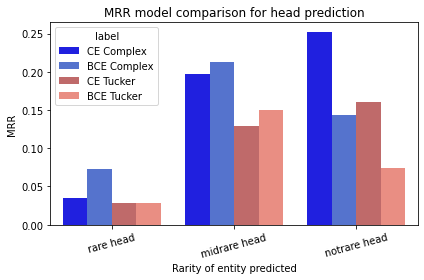

In [75]:
plot_entity_common(df, [], mrr=True, save='head_comparison_covid')

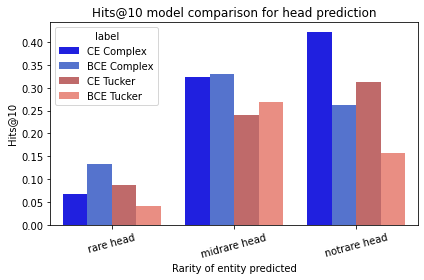

In [80]:
plot_entity_common(df, [], mrr=False, save='head_comparison_covid')

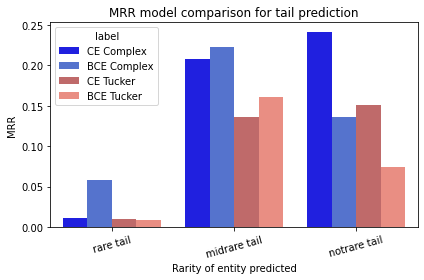

In [79]:
plot_entity_common(df, [], what='tail',mrr=True, save='tail_comparison_covid')

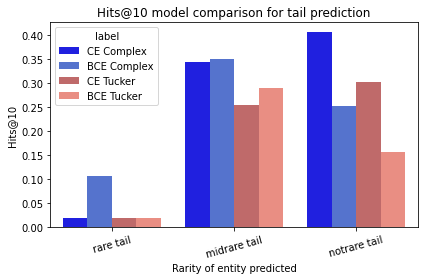

In [81]:
plot_entity_common(df, [], what='tail',mrr=False, save='tail_comparison_covid')

----
# Other experiments

In [120]:
import numpy as np
ce_cp['rel_occurrence'] = ce_cp['Relation'].apply(lambda x: np.log(relation_count[x]))
ce_tuck['rel_occurrence'] = ce_tuck['Relation'].apply(lambda x: np.log(relation_count[x]))


In [121]:
bce_cp['rel_occurrence'] = bce_cp['Relation'].apply(lambda x: np.log(relation_count[x]))
bce_tuck['rel_occurrence'] = bce_tuck['Relation'].apply(lambda x: np.log(relation_count[x]))

In [133]:
ce_cp['rel_occurrence'] = ce_cp['Relation'].apply(lambda x: relation_count[x])
ce_tuck['rel_occurrence'] = ce_tuck['Relation'].apply(lambda x: relation_count[x])
bce_cp['rel_occurrence'] = bce_cp['Relation'].apply(lambda x: relation_count[x])
bce_tuck['rel_occurrence'] = bce_tuck['Relation'].apply(lambda x: relation_count[x])


In [166]:
def plot_group(df1, df2, label1=None, label2=None, mrr=True, bar=True):
    if mrr:
        y_l = 'MRR'
    else:
        y_l = 'h@10'
    if label1 is not None:
        df1['label'] = label1
    if label2 is not None:
        df2['label'] = label2
    conc = pd.concat([df1, df2])
    
#     fig, ax = plt.subplots()
#     ax.set(xscale="log")
#     sns.line(x="rel_occurrence", y="MRR", hue='label', data=conc, ax=ax)
#     plt.show()
    
    
    if bar:
        fig, ax = plt.subplots()
#         ax.set(xscale="log")
        sns.barplot(x='rel_occurrence', y=y_l, hue='label', data=conc, ax=ax)
        plt.show()
    else:
        fig, ax = plt.subplots()
#         ax.set(xscale="log")
        sns.lineplot(x='rel_occurrence', y=y_l, hue='label', data=conc, ax=ax)
        plt.show()
        
        
        
    return

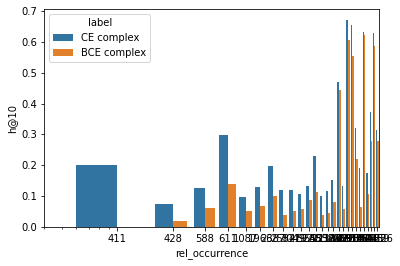

In [132]:
plot_group(ce_cp, bce_cp, mrr=False, bar=True)

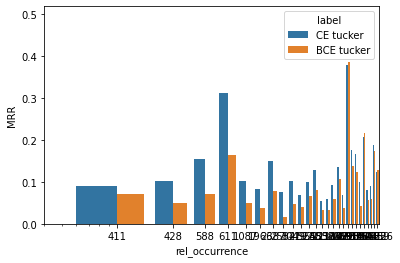

In [135]:
plot_group(ce_tuck, bce_tuck, mrr=True, bar=True)

In [138]:
!pwd

/app/Antonia/Aladdin/biolink/COVID results analysis


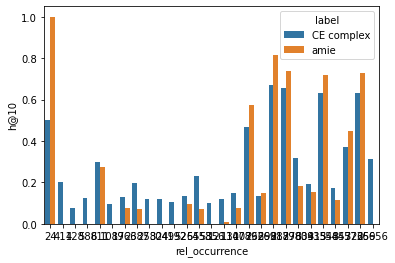

In [168]:
plot_group(ce_cp, amie_res_rel, label2='amie', mrr=False, bar=True)

In [ ]:
fig, ax = plt.subplots()
ax.set(xscale="log")
sns.regplot("rel_occurrence", "MRR", data, ax=ax, scatter_kws={"s": 100})

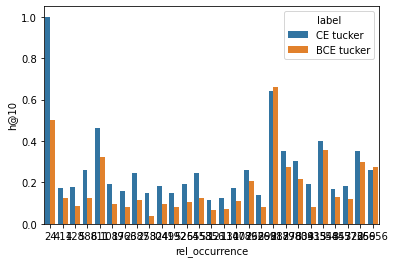

In [167]:
plot_group(ce_tuck, bce_tuck, mrr=False, bar=True)

In [18]:
train_data[train_data[1] == 26]

,0,1,2
16518,6739,26,428
57208,1600,26,2295
68249,5048,26,621
72829,2295,26,1600
93193,1674,26,5154
128067,9519,26,6216
139482,265,26,4369
148065,1783,26,625
165674,1424,26,5259
178414,871,26,176


In [19]:
test_data = pd.DataFrame(d.data['test'])

In [11]:
d.rel_mappings.inverse[26]

'As'

In [7]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [27]:
len(ce_cp['Relation'].unique())

27

In [29]:
ce_cp['MRR'].mean()

0.16646301808672911

In [20]:
bce_cp['MRR'].mean() * 2

0.21708837835383787

In [8]:
bce_cp['h@10'].mean()

0.17666576785955992

In [9]:
ce_cp['h@10'].mean()

0.27234314795580067

In [11]:
0.368/0.2723

1.3514506059493205

In [14]:
0.178/0.108

1.6481481481481481

In [10]:
ce_cp.shape

(27, 5)